In [2]:
import pandas as pd

# Load CSVs
df_16 = pd.read_csv("coin_gecko_2022-03-16.csv")
df_17 = pd.read_csv("coin_gecko_2022-03-17.csv")

# Combine both
df = pd.concat([df_16, df_17], ignore_index=True)

# Dekhne ke liye first few rows
print(df.head())


       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  


In [3]:
# Columns check
print(df.columns)

# Missing values check
print(df.isnull().sum())

# Data types check
print(df.dtypes)

# Duplicate rows?
print(df.duplicated().sum())


Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')
coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64
coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object
0


In [4]:
df['1h'].fillna(df['1h'].mean(), inplace=True)
df['24h'].fillna(df['24h'].mean(), inplace=True)
df['7d'].fillna(df['7d'].mean(), inplace=True)
df['24h_volume'].fillna(df['24h_volume'].mean(), inplace=True)


<ipython-input-4-b6a4d37fd731>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['1h'].fillna(df['1h'].mean(), inplace=True)
<ipython-input-4-b6a4d37fd731>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [5]:
df['liquidity_score'] = df['24h_volume'] / df['mkt_cap']


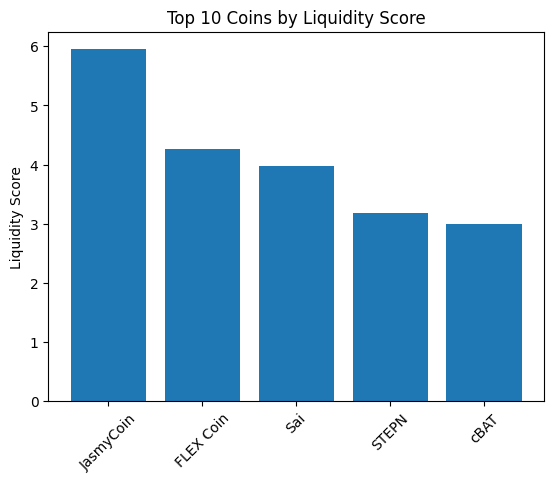

In [6]:
import matplotlib.pyplot as plt

# Top 10 coins by liquidity
top_coins = df.sort_values('liquidity_score', ascending=False).head(10)

plt.bar(top_coins['coin'], top_coins['liquidity_score'])
plt.title("Top 10 Coins by Liquidity Score")
plt.xticks(rotation=45)
plt.ylabel("Liquidity Score")
plt.show()


In [7]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_score
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,0.045903
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,0.060374
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,0.724503
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,0.021795
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,0.074150
...,...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17,0.043719
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17,0.005408
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17,0.201198
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17,0.139464


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_score']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [9]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_score
0,Bitcoin,BTC,9.913189e-01,0.908636,0.552739,0.118660,6.108705e-01,0.993446,2022-03-16,0.007717
1,Ethereum,ETH,6.658398e-02,0.911139,0.556010,0.120596,3.408769e-01,0.421435,2022-03-16,0.010149
2,Tether,USDT,2.426167e-05,0.879850,0.527392,0.108014,1.000000e+00,0.102962,2022-03-16,0.121795
3,BNB,BNB,9.302654e-03,0.903630,0.551104,0.108788,2.409346e-02,0.082445,2022-03-16,0.003664
4,USD Coin,USDC,2.425862e-05,0.879850,0.528209,0.108014,6.683828e-02,0.067211,2022-03-16,0.012465
...,...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,1.344718e-06,0.901126,0.525756,0.090979,5.138242e-05,0.000003,2022-03-17,0.007350
996,Circuits of Value,COVAL,9.209975e-07,0.883605,0.518397,0.097561,6.331012e-06,0.000003,2022-03-17,0.000909
997,ARPA Chain,ARPA,1.674137e-06,0.881101,0.534751,0.100852,2.353287e-04,0.000003,2022-03-17,0.033823
998,SuperRare,RARE,1.127229e-05,0.877347,0.539657,0.111692,1.622201e-04,0.000002,2022-03-17,0.023445


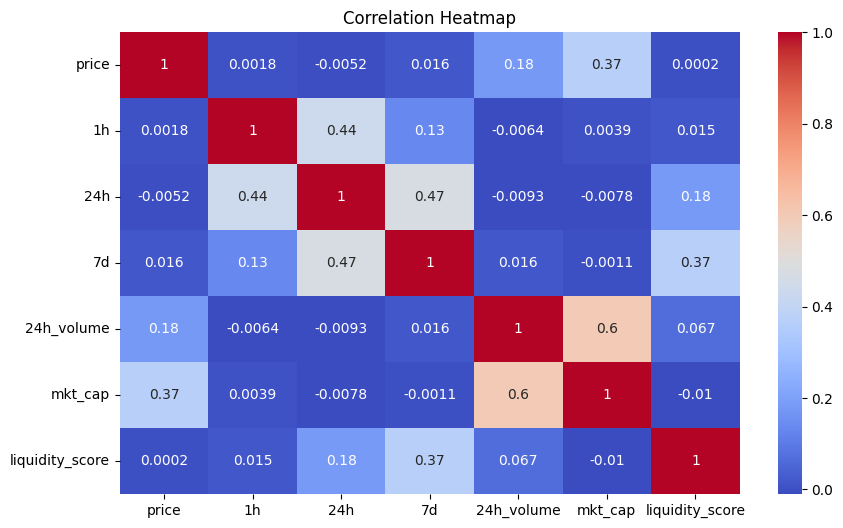

In [11]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


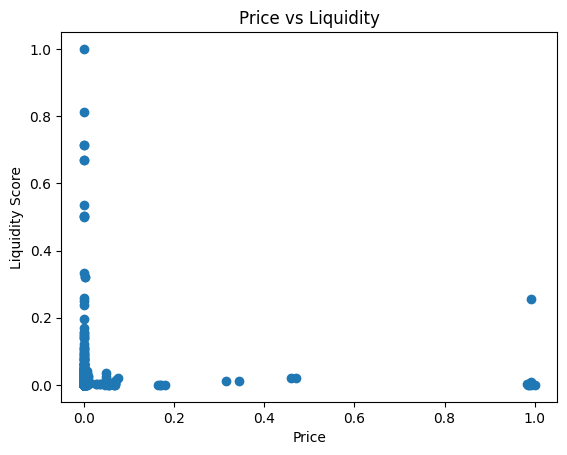

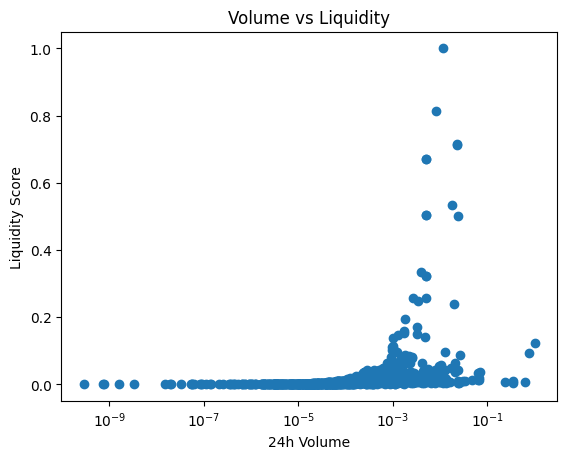

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price vs Liquidity
plt.scatter(df['price'], df['liquidity_score'])
plt.xlabel("Price")
plt.ylabel("Liquidity Score")
plt.title("Price vs Liquidity")
plt.show()

# Volume vs Liquidity
plt.scatter(df['24h_volume'], df['liquidity_score'])
plt.xlabel("24h Volume")
plt.ylabel("Liquidity Score")
plt.title("Volume vs Liquidity")
plt.xscale("log")  # optional
plt.show()


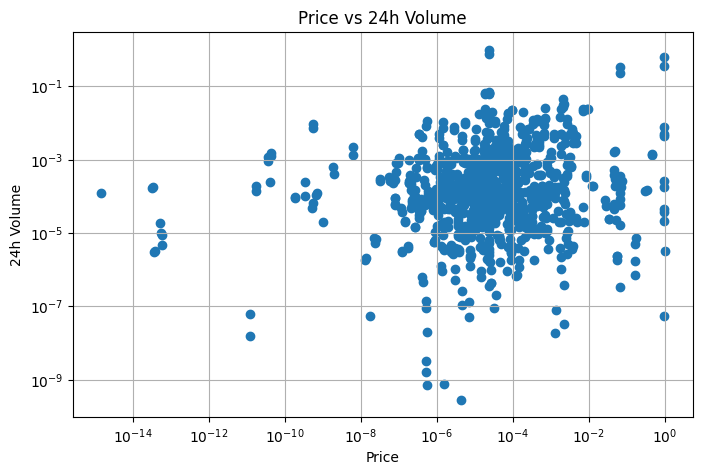

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df['price'], df['24h_volume'])
plt.xlabel("Price")
plt.ylabel("24h Volume")
plt.title("Price vs 24h Volume")
plt.xscale("log")  # optional: agar prices bahut vary karte hain
plt.yscale("log")  # same for volume
plt.grid(True)
plt.show()


<ipython-input-14-e57aed5cf6e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mkt_cap', y='coin', data=top10, palette="viridis")


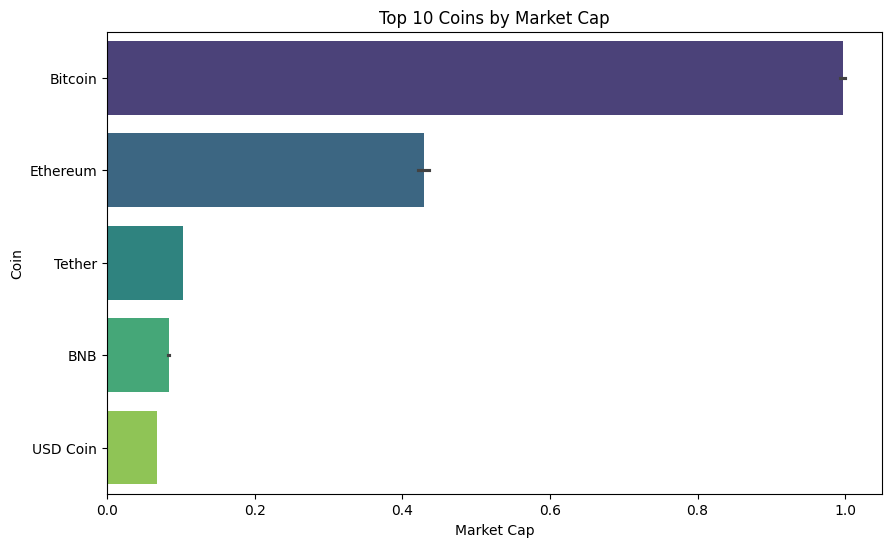

In [14]:
top10 = df.sort_values(by='mkt_cap', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='mkt_cap', y='coin', data=top10, palette="viridis")
plt.title("Top 10 Coins by Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("Coin")
plt.show()


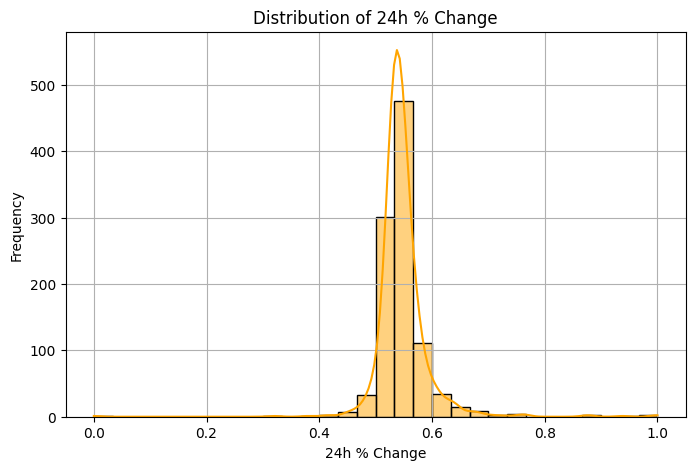

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['24h'], bins=30, kde=True, color='orange')
plt.title("Distribution of 24h % Change")
plt.xlabel("24h % Change")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [16]:
# Price change ratio
df['price_change_ratio'] = df['24h'] / df['price']

# Volume to price
df['volume_to_price'] = df['24h_volume'] / df['price']

# Stable coin feature
stable_coins = ['USDT', 'USDC', 'BUSD']
df['is_stable_coin'] = df['symbol'].apply(lambda x: 1 if x in stable_coins else 0)


In [17]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_score,price_change_ratio,volume_to_price,is_stable_coin
0,Bitcoin,BTC,9.913189e-01,0.908636,0.552739,0.118660,6.108705e-01,0.993446,2022-03-16,0.007717,0.557580,0.616220,0
1,Ethereum,ETH,6.658398e-02,0.911139,0.556010,0.120596,3.408769e-01,0.421435,2022-03-16,0.010149,8.350504,5.119504,0
2,Tether,USDT,2.426167e-05,0.879850,0.527392,0.108014,1.000000e+00,0.102962,2022-03-16,0.121795,21737.644472,41217.270061,1
3,BNB,BNB,9.302654e-03,0.903630,0.551104,0.108788,2.409346e-02,0.082445,2022-03-16,0.003664,59.241572,2.589956,0
4,USD Coin,USDC,2.425862e-05,0.879850,0.528209,0.108014,6.683828e-02,0.067211,2022-03-16,0.012465,21774.089782,2755.238545,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,1.344718e-06,0.901126,0.525756,0.090979,5.138242e-05,0.000003,2022-03-17,0.007350,390978.928612,38.210560,0
996,Circuits of Value,COVAL,9.209975e-07,0.883605,0.518397,0.097561,6.331012e-06,0.000003,2022-03-17,0.000909,562865.141388,6.874082,0
997,ARPA Chain,ARPA,1.674137e-06,0.881101,0.534751,0.100852,2.353287e-04,0.000003,2022-03-17,0.033823,319418.598800,140.567118,0
998,SuperRare,RARE,1.127229e-05,0.877347,0.539657,0.111692,1.622201e-04,0.000002,2022-03-17,0.023445,47874.620654,14.391056,0


In [18]:
X = df[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
        'price_change_ratio', 'volume_to_price', 'is_stable_coin']]

y = df['liquidity_score']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
import numpy as np

# Step 1: Replace all infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Fill remaining NaNs (if any) with 0
X.fillna(0, inplace=True)


<ipython-input-22-e31b8f524327>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-22-e31b8f524327>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train and predict again
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


RMSE: 0.05790623140086311
MAE: 0.021551791801861633
R² Score: -0.003224246126662278


In [29]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")  # To avoid convergence or warning messages

# 🔹 Define models and hyperparameter grids
models = {
    "Ridge": (Ridge(), {"alpha": [0.01, 0.1, 1, 10]}),
    "Lasso": (Lasso(), {"alpha": [0.01, 0.1, 1, 10]}),
    "DecisionTree": (DecisionTreeRegressor(), {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    }),
    "RandomForest": (RandomForestRegressor(), {
        "n_estimators": [50, 100],
        "max_depth": [5, 10, None]
    }),
    "GradientBoosting": (GradientBoostingRegressor(), {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    }),
    "XGBoost": (XGBRegressor(verbosity=0), {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    }),
    "SVR": (SVR(), {
        "C": [1],  # Light grid to prevent long training
        "kernel": ['rbf']
    })
}

# 🔹 Initialize trackers
best_score = -1
best_model_name = ""
best_model_obj = None
best_params = {}

# 🔹 Train & evaluate all models
for name, (model, params) in models.items():
    print(f"\n🚀 Training {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    score = grid.best_score_
    print(f"{name} R² Score (CV): {score:.4f}")

    if score > best_score:
        best_score = score
        best_model_name = name
        best_model_obj = grid.best_estimator_
        best_params = grid.best_params_
        print("✅ Updated Best Parameters:", best_params)

# 🔹 Final Test Evaluation
print(f"\n🏁 Final Results")
print(f"🏆 Best Model: {best_model_name}")
print(f"✅ Best CV R² Score: {best_score:.4f}")
print(f"🔧 Best Hyperparameters: {best_params}")

# Test performance
y_pred_best = best_model_obj.predict(X_test)
print(f"📊 Test R² Score: {r2_score(y_test, y_pred_best):.4f}")



🚀 Training Ridge...
Ridge R² Score (CV): -0.0716
✅ Updated Best Parameters: {'alpha': 0.1}

🚀 Training Lasso...
Lasso R² Score (CV): -0.7751

🚀 Training DecisionTree...
DecisionTree R² Score (CV): 0.8042
✅ Updated Best Parameters: {'max_depth': None, 'min_samples_split': 2}

🚀 Training RandomForest...
RandomForest R² Score (CV): 0.8606
✅ Updated Best Parameters: {'max_depth': 10, 'n_estimators': 100}

🚀 Training GradientBoosting...
GradientBoosting R² Score (CV): 0.8827
✅ Updated Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

🚀 Training XGBoost...
XGBoost R² Score (CV): 0.8864
✅ Updated Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

🚀 Training SVR...
SVR R² Score (CV): -4.4991

🏁 Final Results
🏆 Best Model: XGBoost
✅ Best CV R² Score: 0.8864
🔧 Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
📊 Test R² Score: 0.6379


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 🔮 Predict on test set
y_test_pred = best_model_obj.predict(X_test)

# 📊 Evaluation metrics
print("Test R² Score:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))


Test R² Score: 0.6379039164790111
Test RMSE: 0.03478870041913287
Test MAE: 0.006679853849245569


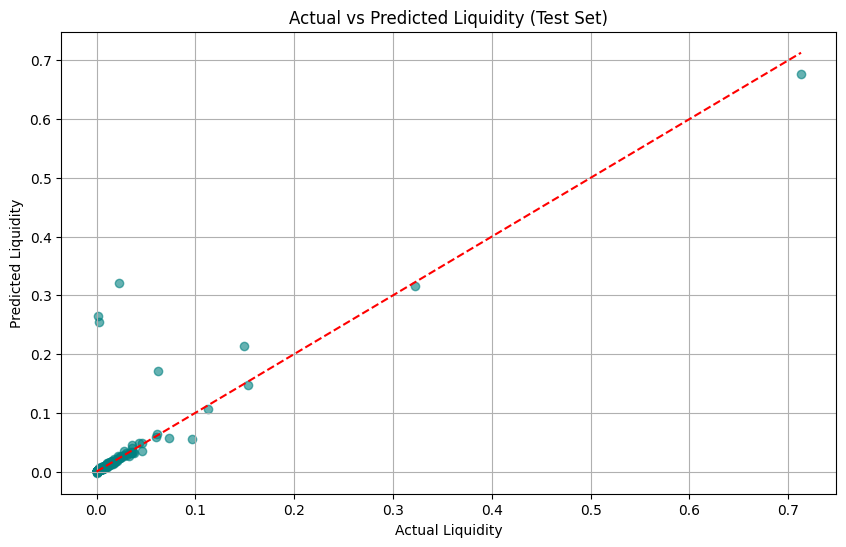

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Liquidity")
plt.ylabel("Predicted Liquidity")
plt.title("Actual vs Predicted Liquidity (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [32]:
import joblib

# 💾 Save the best model
joblib.dump(best_model_obj, "best_model_xgboost.pkl")
print("✅ Model saved as best_model_xgboost.pkl")


✅ Model saved as best_model_xgboost.pkl


In [33]:
# 🔁 Load the model anytime
loaded_model = joblib.load("best_model_xgboost.pkl")

# 🔮 Predict on new/unseen data
new_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions:", new_pred)


Sample Predictions: [0.00037822 0.00108897 0.00643636 0.01487027 0.00132461]
